In [17]:
### classification using decision tree classifier
### tree based approach by studying features ---> ask questions split based on the answer.
### split recursively till convergence to an ideal decision boundary
'''
Formal Definition:
They use a tree-like structure where each internal node represents a test on an attribute,
each branch represents the outcome of the test, and 
each leaf node represents a class label or a prediction.
'''
# entropy: measure of randomness ---> low entropy implies a somewhat pure subset
# lower entropy ensures higher information gain due to nature of the subsets created.
# choose low entropy reaping splits to ensure minimal information loss and maximum info gain.
# this high information gain criteria used to determine split condition. 

# Gini Impurity: impurity in dataset ---> sort of some wrong samples in an otherwise pure 
#                                         decision boundary created region.
# one red sample in an area with all other green samples.

### problem: predict if salary > $100,000 based on a 3D feature vector

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [10]:
df = pd.read_csv("salaries.csv")
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [18]:
# assigning dependent and independent vars:

independent_var = df[["company", "job", "degree"]]
target_var = df["salary_more_then_100k"]

independent_var

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [34]:
# encoding for the independent vars required due to text data.

# creating encoder object for the columns that require encoding 

le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

# creating 3 new columns with encoded vals appended as separate cols.

independent_var["encoded_company"] = le.fit_transform(independent_var["company"])
independent_var["encoded_job"] = le.fit_transform(independent_var["job"])
independent_var["encoded_degree"] = le.fit_transform(independent_var["degree"])

independent_var

,company,job,degree,encoded_company,encoded_job,encoded_degree
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [39]:
# dropping text cols and keeping encoded cols and creating a new final dataframe

final_independent_vars = independent_var.drop(["company", "job", "degree"], axis=1)
final_independent_vars

,encoded_company,encoded_job,encoded_degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [41]:
decision_tree_classifier = DecisionTreeClassifier()

decision_tree_classifier.fit(final_independent_vars, target_var)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


[Text(0.4166666666666667, 0.9166666666666666, 'x[0] <= 0.5\ngini = 0.469\nsamples = 16\nvalue = [6, 10]'),
 Text(0.25, 0.75, 'x[1] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.33333333333333337, 0.8333333333333333, 'True  '),
 Text(0.16666666666666666, 0.5833333333333334, 'x[2] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.08333333333333333, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.25, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3333333333333333, 0.5833333333333334, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.5833333333333334, 0.75, 'x[0] <= 1.5\ngini = 0.375\nsamples = 12\nvalue = [3, 9]'),
 Text(0.5, 0.8333333333333333, '  False'),
 Text(0.5, 0.5833333333333334, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.6666666666666666, 0.5833333333333334, 'x[1] <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.5833333333333334, 0.4166666666666667, 'gini = 0.0\nsamples = 2\nvalue = [0, 

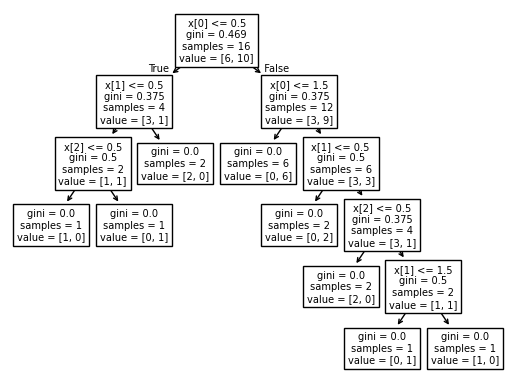

In [44]:
# plotting the classifier tree. 

plot_tree(decision_tree_classifier)

In [46]:
# perfect accurascy due to small dataset with training and test set being same.
decision_tree_classifier.score(final_independent_vars, target_var) 

1.0